# CSC-321: Data Mining and Machine Learning
## Assignment 2: Simple Linear Regression

### Part 1: Implementing SLR

Refer to the class slides for an overview of how simple linear regression works. Then implement the following algorithms. I will NOT be grading you on the style elements of your code (although I may give feedback) however you should try to use good programming style, especially with respect to variable names, spacing and sensible code choices.

Take the contrived list of data given, where the first element in each list is the input data, x, and the second element is the target value, y.

(a) First, read the following example page for matplotlib, and create a plot of the points in the data set. Make the data points blue triangles. Make the axis in both directions range from 0 to 6.

https://matplotlib.org/users/pyplot_tutorial.html


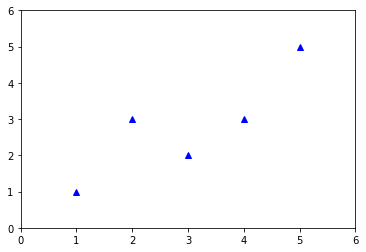

In [10]:
import matplotlib.pyplot as plt

# Use this dataset for all examples

dataset = [[1,1],[2,3],[4,3],[3,2],[5,5]]
#1A
plotDataX = [i[0] for i in dataset]
plotDataY = [i[1] for i in dataset]
plt.plot(plotDataX, plotDataY,'b^')
plt.axis([0,6,0,6])
plt.show()


(b) Create a function that returns the mean for a list of values, with the signature: mean(listOfValues)

(c) Create a function that computes the variance of a list of values. NOTE - NOT the average variance, the total. That is, for each value of x, subtract the mean and square the result. Sum the resulting values, and return. Give the function the signature: variance(listOfValues,meanValue)

(d) Create a function that computes the covariance between two lists of numbers. Given two lists (x and y), and two means for those lists, for each value in x, subtract the mean of x, and then multiply by the corresponding value of (y minus the mean of y). Sum the resulting values and return. The function should have the signature: covariance(listofX, meanOfX, listOfY, meanOfY)

(e) Using your functions above, write a function that given a dataset such as the one specified above, and computes the two coefficients, b1 and b0. Remember, b1 is computed by dividing the covariance of x and y by the variance of x. b0 is computed by taking the mean of y, and subtracting b1 multiplied by the mean of x from it. Return the two coefficients, b0 and b1, in that order, in a single list. The function should have the signature coefficients(dataset)

(f) Add code for testing that calls your coefficients function, with the dataset above. Print both of the resulting coefficients nicely.

In [11]:
# Write your functions b thru e here
import math
#1b
def mean(listOfValues):
    total = 0
    for num in listOfValues:
        total += num
    return total/len(listOfValues)

#1c
def variance(listOfValues, meanValue):
    total = 0
    for num in listOfValues:
       total +=  (num - meanValue)**2
    return total

#1d
def covariance(listOfX, meanOfX, listOfY, meanOfY):
    total = 0
    for i in range(len(listOfX)):
        total += (listOfX[i] - meanOfX)*(listOfY[i]-meanOfY)
    return total

#1e
def coefficients(dataset):
    dataX = [i[0] for i in dataset]
    dataY = [i[1] for i in dataset]
    meanX = mean(dataX)
    meanY = mean(dataY)
    b1 = covariance(dataX, meanX, dataY, meanY)/variance(dataX, meanX)
    b0 = meanY-b1*meanX
    return[b0, b1]
    
#1f
testb0b1 = coefficients(dataset)
print('B0 for dataset', testb0b1[0])
print('B1 for dataset', testb0b1[1])


B0 for dataset 0.39999999999999947
B1 for dataset 0.8


(g) Now you have sufficient functionality to write a function to make predictions using simple linear regression. Create a function with the signature slg(train,test). Training data is data containing the features of the data AND the class. Testing data contains the features, but does NOT contain a class (instead it should hold the value None in place of the class entry). Remember None is a special keyword in python: https://www.w3schools.com/python/ref_keyword_none.asp

We're going to use the same dataset here for both training and testing. Does this seem like a good idea? We'll talk about it in class later. 

Here's the slg algorithm. We're going to create our coefficients from the training data. We're going to create a new list, to hold our predicitions. Then for each entry in the testing data, we're going to read the input value, and apply the formula y = b0 + b1 * x(i)

For each entry in the test data, we're going to append our predicted y value. We're going to return our list of predictions.

(h) Add code for testing that calls your slg function, with the dataset above as both training and testing. Print the input and the predicted output.

(i) Recreate the plot from (a) above, plotting the points the same as before. But this time ALSO plot a line (x against predicted y) in red, that shows how well the slg algorithm is modeling the output. 

input x values: [1, 2, 4, 3, 5]
predicted outputs: [1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]


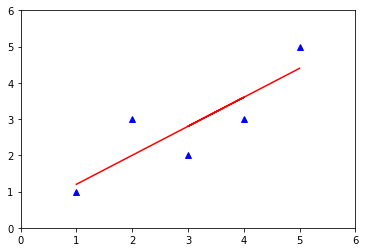

In [12]:
# Write the function slg(train,test) here
def slr(train, test):
    coeff = coefficients(train)
    b0 = coeff[0]
    b1 = coeff[1]
    predictions = []
    for i in test:
        predictions.append(b0+b1*i[0])
    return predictions
    


# Call the function slg below
predictions = slr(dataset, dataset)
plotDataX = [i[0] for i in dataset]
print('input x values:', plotDataX )
print('predicted outputs:', predictions)


# Plot the results
plotDataY = [i[1] for i in dataset]
plt.plot(plotDataX, plotDataY,'b^')
plt.plot(plotDataX, predictions, 'r')
plt.axis([0,6,0,6])
plt.show()



### Part 2: Implementing zeroR

In class we learned about the zeroR algorithm. For regression, that means that we will always predict the mean value of the y variable - the target. 

(a) Write the function zeroRR (for regression) below. This function will take two arguments, train and test data. It will take the last value of each input instance in the data set as the target value, y and compute the mean from those values. For prediction, it will assign this mean to every input variable as predicted output. Return the list of predictions. 

(b) Add code for testing that calls your zeroRR function, with the dataset above as both training and testing. Print the input and the predicted output.

(c) Recreate the plot from (i) in Part 1, above. Plot the points, the predicted output y from the slg algorithm, and the predicted output y from the zeroRR algorithm as another line, this time in green.

input x values: [1, 2, 4, 3, 5]
predicted outputs for zeroR: [2.8, 2.8, 2.8, 2.8, 2.8]


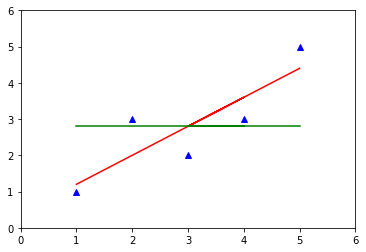

In [13]:
# Write the function zeroRR(train,test) here
def zeroRR(train, test):
    trainY = [i[1] for i in train]
    testY = [i[1] for i in test]

    trainYMean = mean(trainY)
    predictions = []
    for i in testY:
        predictions.append(trainYMean)
    return predictions



# Call the function zeroRR below
predictionsZeroR = zeroRR(dataset, dataset)
plotDataX = [i[0] for i in dataset]
print('input x values:', plotDataX )
print('predicted outputs for zeroR:', predictionsZeroR)

# Plot the results

plotDataY = [i[1] for i in dataset]
plt.plot(plotDataX, plotDataY,'b^')
plt.plot(plotDataX, predictions, 'r')
plt.plot(plotDataX, predictionsZeroR, 'g')
plt.axis([0,6,0,6])
plt.show()


### Part 3: Evaluating output

We want to be able to evaluate the output of our algorithms. We will implement the RMSE algorithm for evaluating performance. This function will take two lists of values - actual y values and predicted y values.

(a) Write a function that calculates RMSE. It starts with an error of 0.0, It then goes through each actual y value in the actual list, and calculates the prediction error, by taking the actual value away from the predicted value, and squares the error. Those squared errors are summed for all instances and then the average squared error is calculated, dividng the sum of the square errors by the number of predictions. Return the square root of that average error.

In [14]:
# Write the function rmse_eval(actual,predicted) below
def rmse_eval(actual, predicted):
    error = 0.0
    for i in range(len(actual)):
        error += (predicted[i] - actual[i])**2
    error = error/len(actual)
    error = error**0.5
    return error




### Part 4: Putting it all together

Below I have provided code that SHOULD work, if you've written everything correctly. You do need to specifiy THREE lists. train will be the same as dataset. Test will also be the same, BUT the last element of each instance should be None. Actual is just the list of the last element from each instance. Make sure when you are copying, slicing and replacing that you have three distinct lists.

Notice how I have a generic function to evaluate an algorithm, where the algorithm and the evaluation metric are passed as arguments. DO NOT change this code, other than to define the lists required.

FINALLY, add a comment after the last line of code below, telling me which algorithm works better, simple linear regression or zeroRR.

In [15]:
# code to evaluate an algorithm, using a train/test split

def evaluate_algorithm(dataset, algorithm, metric):
    train = dataset
    test = [[i[0], None] for i in dataset]
    predicted = algorithm(train,test)
    actual = [i[1] for i in dataset]
    result = metric(actual,predicted)
    return result


# Testing simple linear regression

dataset = [[1,1],[2,3],[4,3],[3,2],[5,5]]
slr_result = evaluate_algorithm(dataset,slr,rmse_eval)
zeroRR_result = evaluate_algorithm(dataset,zeroRR,rmse_eval)

print('SLR RMSE: %.3f' % slr_result)
print('zeroRR RMSE: %.3f' % zeroRR_result)

#simple linear regression works better because its error is only 0.692 compared
#to 1.327 for zeroRR

SLR RMSE: 0.693
zeroRR RMSE: 1.327
